## Import necessary modules

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from math import log
import xgboost as xgb

In [2]:
df1 = pd.read_csv('version_100.csv')

In [3]:
df2 = pd.read_csv('Total_Living_Area_BedRoomSquared.csv')

In [4]:
df1.head()

,Unnamed: 0,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LowQualFinSF,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,3,5.0,1.0,6,1,7.0,0,5,7,0.0,0,548.0,2.0,5.0,2,5.0,1710,9,1,7.0,8450,0,196.0,2,61,5,7,0,12.247694,0,856.0,0,15,4,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,3,5.0,4.0,5,1,7.0,0,5,5,5.0,1,460.0,2.0,5.0,2,5.0,1262,9,1,5.0,9600,0,0.0,5,0,8,6,0,12.109011,0,1262.0,298,42,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,0,3,5.0,2.0,6,1,7.0,0,5,7,5.0,1,608.0,2.0,5.0,2,5.0,1786,9,1,7.0,11250,0,162.0,9,42,5,7,0,12.317167,0,920.0,0,17,2,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,3,7.0,1.0,5,1,5.0,272

In [5]:
# df_1 is the dataframe with the TotalLivingArea and without the lotArea
df1['Total_Living_Area'] = df1['TotalBsmtSF'] + df1['LowQualFinSF'] + df1['ScreenPorch'] + df1['GarageArea'] + df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['3SsnPorch'] + df1['PoolArea'] +df1['WoodDeckSF'] + df1['GrLivArea'] + df1['MasVnrArea']

df1.sample(5)

,Unnamed: 0,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GrLivArea,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LowQualFinSF,MasVnrArea,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area
339,339,0,3,3.0,1.0,3,1,5.0,0,5,5,0.0,0,297.0,1.0,5.0,1,5.0,1215,5,1,5.0,12400,0,176.0,6,0,7,6,0,11.95118,234,1215.0,0,60,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3137.0
2460,2460,0,4,5.0,1.0,3,1,5.0,0,7,5,0.0,0,280.0,1.0,5.0,1,5.0,1322,9,1,5.0,6240,0,0.0,7,0,8,5,0,NaN,0,672.0,0,79,2,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2274.0
2882,2882,0,4,5.0,1.0,5,1,5.0,0,7,7,7.0,1,451.0,2.0,5.0,1,5.0,1671,9,1,5.0,8170,0,270.0,2,0,7,7,0,NaN,0,1022.0,0,89,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
df1['Bedrooms'] = df1['BedroomAbvGr']**2


In [7]:
df1.columns.tolist()

['Unnamed: 0',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'FireplaceQu',
 'Fireplaces',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GrLivArea',
 'HeatingQC',
 'KitchenAbvGr',
 'KitchenQual',
 'LotArea',
 'LowQualFinSF',
 'MasVnrArea',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt_age',
 'NonKitchenBedroomAbvGr',
 'BathRooms',
 'CentralAir_Y',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',

In [8]:
df1.drop(['Unnamed: 0', 'TotalBsmtSF', 'LowQualFinSF', 'ScreenPorch', 'GarageArea', 'OpenPorchSF','GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'WoodDeckSF', 'GrLivArea','MasVnrArea', 'BedroomAbvGr', 'YearBuilt_age'], axis = 1, inplace = True)

In [9]:
df1.sample(5)

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,MoSold,OverallCond,OverallQual,SalePrice,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area,Bedrooms
2328,5.0,1.0,6,1,7.0,5,5,5.0,1,2.0,5.0,2,5.0,9,1,5.0,9487,6,5,6,NaN,3,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3097.0,9
1968,5.0,4.0,6,1,9.0,5,9,7.0,1,3.0,5.0,3,5.0,9,1,9.0,14418,5,5,9,NaN,4,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,5449.0,4
640,5.0,4.0,6,1,9.0,5,9,7.0,1,2.0,5.0,2,5.0,9,1,9.0,12677,4,5,8,12.520883,4,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4421.0,1
1006,5.0,1.0,2,1,7.0,5,5,5.0,1,2.0,5.0,1,5.0,7,1,5.0,12155,3,3,6,12.004568,3,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0

In [10]:
df1.drop('LotArea', axis = 1, inplace = True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 163 entries, BsmtCond to Bedrooms
dtypes: float64(10), int64(153)
memory usage: 3.6 MB


In [12]:
train_data_01 = df1.iloc[:1460,:]

In [13]:
test_data_01 = df1.iloc[1460:,:]

In [14]:
test_data_01.sample(10)

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,SalePrice,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area,Bedrooms
2630,5.0,1.0,6,1,9.0,5,9,7.0,1,3.0,5.0,2,5.0,9,1,9.0,7,5,10,NaN,6,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6268.0,16
1860,0.0,0.0,0,0,0.0,5,5,0.0,0,2.0,5.0,1,5.0,5,2,5.0,6,5,5,NaN,2,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1913.0,16
2370,5.0,1.0,6,1,7.0,5,7,0.0,0,2.0,5.0,1,5.0,9,1,7.0,9,5,6,NaN,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3017.0,9
1912,5.0,1.0,1,1,5.0,5,5,0.0,0,2.0,5.0,1,5.0,9,1,7.0,12,6,5,NaN,5,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [66]:
test_data_01.drop('SalePrice', axis = 1, inplace = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
test_data_01.isnull().sum()

BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinType2              0
BsmtQual                  0
ExterCond                 0
ExterQual                 0
FireplaceQu               0
Fireplaces                0
GarageCars                0
GarageCond                0
GarageFinish              0
GarageQual                0
HeatingQC                 0
KitchenAbvGr              0
KitchenQual               0
MoSold                    0
OverallCond               0
OverallQual               0
NonKitchenBedroomAbvGr    0
BathRooms                 0
CentralAir_Y              0
Condition1_Feedr          0
Condition1_Norm           0
Condition1_PosA           0
Condition1_PosN           0
Condition1_RRAe           0
Condition1_RRAn           0
Condition1_RRNe           0
Condition1_RRNn           0
Electrical_FuseF          0
Electrical_FuseP          0
Electrical_Mix            0
Electrical_SBrkr          0
Exterior1st_AsphShn       0
Exterior1st_BrkComm 

In [16]:
y = train_data_01['SalePrice']

In [17]:
X = train_data_01.drop('SalePrice', axis = 1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Decision Tree

In [19]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, # max depth the tree should traverse. Good to control OverFitting. TO STOP
             min_samples_leaf = 0.13,   # mininum nuber of samples in the node before it turns into a terminal node
            random_state=3)

In [20]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

### Evaluate the Decision tree

In [21]:
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {}".format(rmse_dt))

Test set RMSE of dt: 0.2383957875036891


## Random Forest

In [22]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [23]:
# Predict the test set labels
y_pred = rf.predict(X_test)

In [24]:
# Evaluate the test set RMSE
RMSE_test = (MSE(y_pred, y_test))**0.5

In [25]:
print('RMSE: {}'.format(RMSE_test))

RMSE: 0.15211300076818243


In [26]:
# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_, 
                       index = X_train.columns)


In [27]:


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)



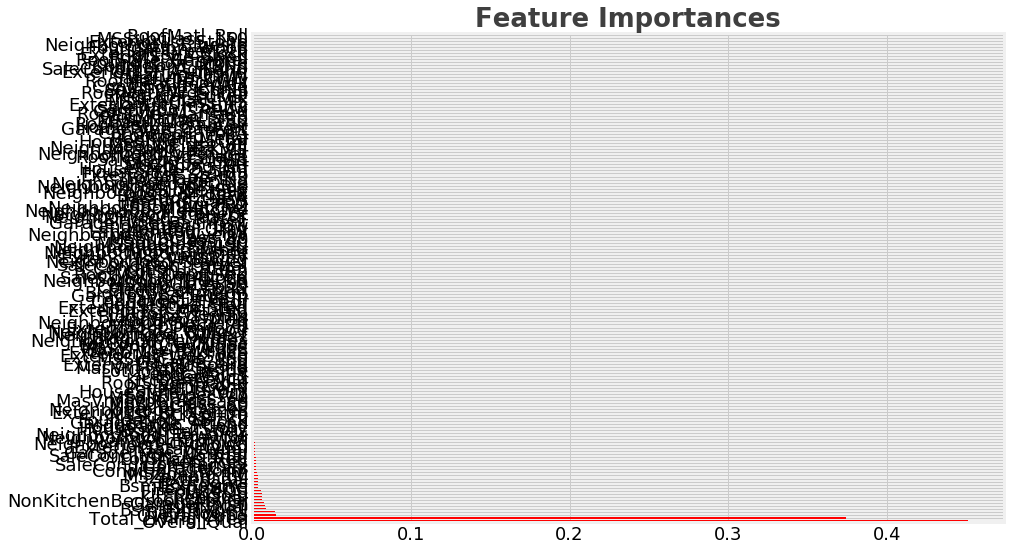

In [28]:
# Horizontal barplot

importances_sorted.plot(kind = 'barh', figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

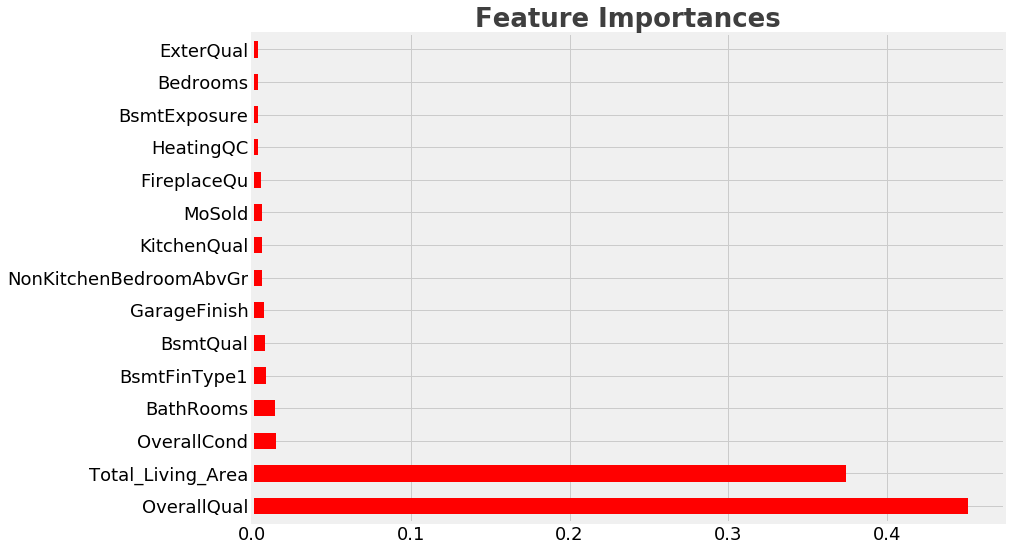

In [29]:
# Horizontal barplot

importances_sorted[:15].plot(kind = 'barh', figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

### Random forests hyperparameters

In [30]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [31]:
### Set the hyperparameter grid of RF
params_rf = {'n_estimators': range(100, 500, 25), # The number of trees in the forest
             'max_depth':[4,6,8],
             'max_features': ['log2', 'auto', 'sqrt'], 
             'min_samples_leaf': [2,10,303]} # The minimum number of samples required to be at a leaf node.
#The number of features to consider when looking for the best split
# If “auto”, then max_features=n_features.
# If “sqrt”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).

### Search for the optimal forest

In [34]:
grid_rf = GridSearchCV(estimator = rf, 
                       param_grid = params_rf,
                       scoring = 'neg_mean_squared_error', 
                       cv= 10,
                       verbose = 1, 
                       n_jobs = -1)

In [35]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1838 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3238 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4088 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 500, 25), 'max_depth': [4, 6, 8], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 303]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

### Evaluate the optimal forest

In [36]:
# Extract the best estimator
best_model = grid_rf.best_estimator_
print(best_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)


In [37]:
# Predict test set labels
y_pred = best_model.predict(X_test)

In [38]:
#Compute RMSE
RMSE_test = (MSE(y_test, y_pred))**0.5

In [39]:
print("Test RMSE of the best model: {}" .format(RMSE_test))

Test RMSE of the best model: 0.15489803540858393


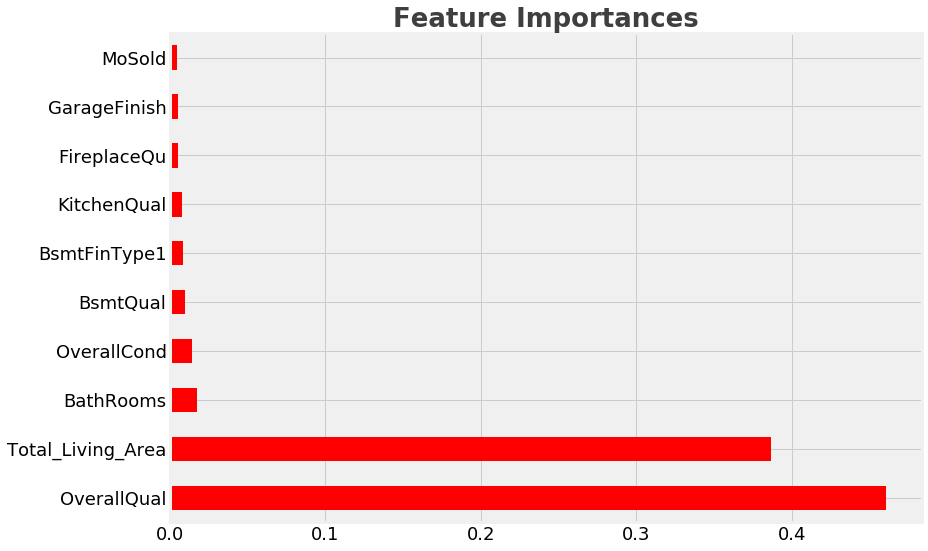

In [40]:
# Create a pd.Series of features importances
importances = pd.Series(data = best_model.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh', figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

In [41]:
params_rf2 = {'n_estimators': range(100, 500, 25), # The number of trees in the forest
             'max_depth':[4,6,8],
             'max_features': ['log2', 'auto', 'sqrt'], #The number of features to consider when looking for the best split
             'min_samples_leaf': [2,10,303]} # The minimum number of samples required to be at a leaf node.




In [42]:
grid_rf2 = GridSearchCV(estimator = rf, 
                       param_grid = params_rf2,
                       scoring = 'neg_mean_squared_error', 
                       cv= 10,
                       verbose = 1, 
                       n_jobs = -1)

In [43]:
grid_rf2.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  8.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 500, 25), 'max_depth': [4, 6, 8], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 303]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [44]:
best_model2 = grid_rf2.best_estimator_
print(best_model2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)


In [45]:
# Predict test set labels
y_pred2 = best_model2.predict(X_test)

In [46]:
# Compute RMSE
RMSE_test = (MSE(y_test, y_pred2))**0.5

In [47]:
#print("Test MSE of the best model: {}" .format(MSE_test))
print("Test RMSE of the best model: {}" .format(RMSE_test))

Test RMSE of the best model: 0.15489803540858393


In [48]:
### Visualizing features importances

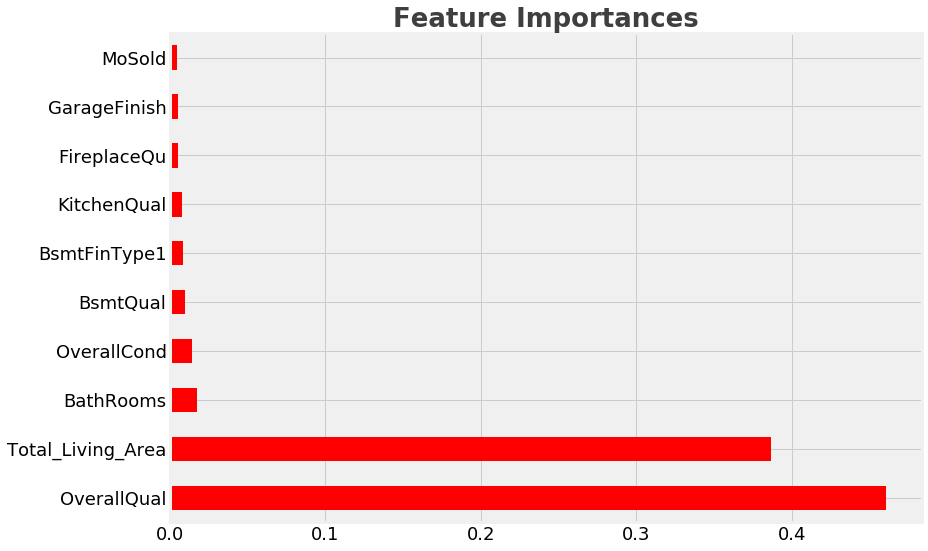

In [49]:
# Create a pd.Series of features importances
importances = pd.Series(data = best_model2.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh',figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

In [50]:
## Gradient Boosting Regression

In [51]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
#Instantiate GBR
gb = GradientBoostingRegressor(n_estimators = 200,
                              max_depth = 4,
                              random_state = 2)

In [53]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=2,
             subsample=1.0, verbose=0, warm_start=False)

In [54]:
y_pred = gb.predict(X_test)

In [55]:
MSE_test = MSE(y_pred, y_test)

In [56]:
RMSE_test = MSE(y_pred, y_test)**0.5

In [57]:
print('Test set MSE of gb: {}'.format(MSE_test))
print('Test set RMSE of gb: {}'.format(RMSE_test))

Test set MSE of gb: 0.018392693408106023
Test set RMSE of gb: 0.13561966453323065


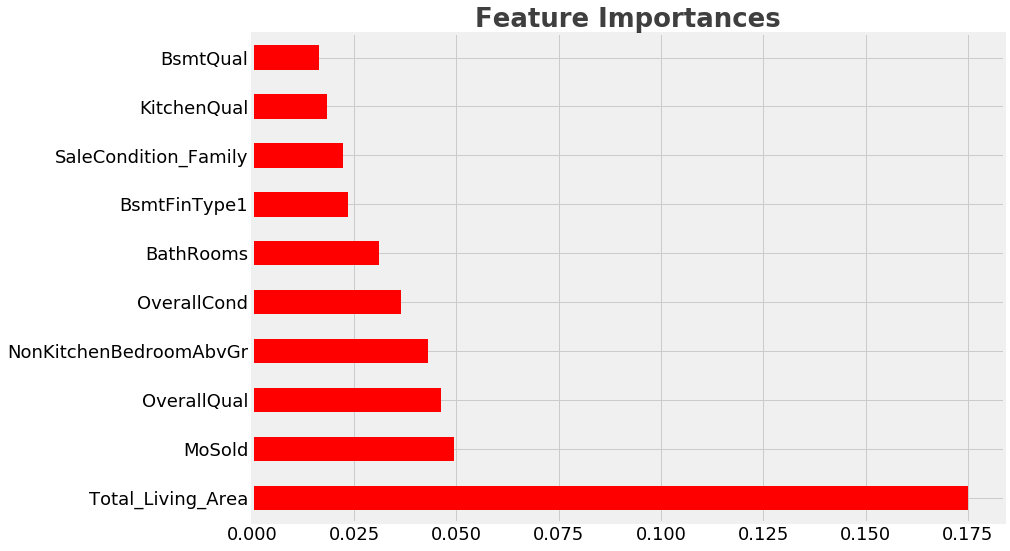

In [58]:
# Create a pd.Series of features importances
importances = pd.Series(data = gb.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh',figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

In [59]:
##  stochastic gradient boosting regression

In [60]:
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,               
            random_state=2)

In [61]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.75,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=2,
             subsample=0.9, verbose=0, warm_start=False)

In [62]:
# Predict test set labels
y_pred = sgbr.predict(X_test)

#Compute test set MSE
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test**0.5

# Print rmse_test
print('Test set MSE of sgbr: {:.3f}'.format(mse_test))
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set MSE of sgbr: 0.018
Test set RMSE of sgbr: 0.133


In [68]:
# Predict test set labels
test_y_pred = sgbr.predict(test_data_01)

sub = pd.DataFrame()
sub['ID'] = range(1461,2920)
sub['SalePrice'] = test_y_pred
sub.to_csv('submission.csv', index = False)

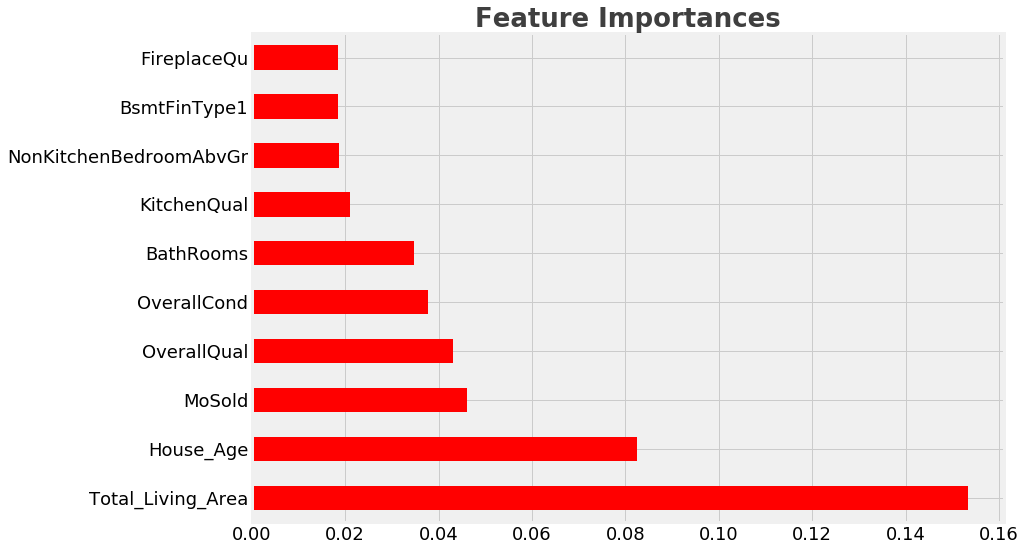

In [61]:
# Create a pd.Series of features importances
importances = pd.Series(data = sgbr.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh',figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

In [115]:
## XGBoost

In [116]:



# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.048995


In [117]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(X_train, y_train)
DM_test = xgb.DMatrix(X_test, y_test)

# Create a parameter dictionary:params
params = {'booster': 'gblinear', 'objective': 'reg:linear'}

housing_matrix = xgb.DMatrix(data = X_train, label = y_train)

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain = DM_train, num_boost_round=5)

# Predict the labels of the test set = preds
preds = xg_reg.predict(DM_test)

# Compute and print RMSE
rmse = np.sqrt(MSE(y_test,preds))
print('RMSE: {}'.format(rmse))

RMSE: 0.8155599974710712


In [118]:
params = {'objective': 'reg:linear', 'max_depth': 4}

In [119]:
cv_results = xgb.cv(dtrain = housing_matrix, params = params, nfold=4,
                   num_boost_round = 5, 
                   metrics = 'rmse', as_pandas = True, seed = 123)

[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [120]:
print (cv_results)

   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0        8.079227       0.017502         8.079241        0.003843
1        5.667100       0.018348         5.665011        0.002669
2        3.976002       0.018037         3.974252        0.001594
3        2.792713       0.015066         2.790782        0.000905
4        1.963953       0.011714         1.962350        0.000271


In [121]:
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

4    1.963953
Name: test-rmse-mean, dtype: float64


In [122]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
# number of boosting rounds = number of trees we build)
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# We'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.
# Iterate over num_rounds and build one model per num_boost_round parameter

for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))

df_num_boost_runs = pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"])



[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [127]:
print(df_num_boost_runs)

   num_boosting_rounds      rmse
0                    5  1.967240
1                   10  0.375895
2                   15  0.167252


In [123]:
# early stopping technique: More automated tuning compared to cherry picking parameters to tune.
# Early stopping works by testing the XGBoost model after every boosting
# round against a hold-out dataset and stopping the creation of 
# additional boosting rounds (thereby finishing training of the model 
# early) if the hold-out metric ("rmse" in our case) does not improve 
# for a given number of rounds. Here you will use the 
# early_stopping_rounds parameter in xgb.cv() with a large possible 
# number of boosting rounds (50). Bear in mind that if the holdout 
# metric continuously improves up through when num_boosting_rounds is 
# reached, then early stopping does not occur.

In [124]:
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain = housing_dmatrix, params = params, metrics = 'rmse', num_boost_round = 50, early_stopping_rounds = 10)

# Print cv_results
print(cv_results)
auto_early_stopping_df = pd.DataFrame(cv_results, columns = ['test-rmse-mean', 'test-rmse-std' , 'train-rmse-mean',  'train-rmse-std'])
print(auto_early_stopping_df)

[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[18:40:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:40:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

In [125]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid =gbm_param_grid,
    estimator = gbm,
    scoring = "neg_mean_squared_error",
    cv = 4)

# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.7, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  0.14923992328509417


In [126]:

gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions = gbm_param_grid, estimator = gbm, scoring = 'neg_mean_squared_error', n_iter = 5, cv = 4)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))



Best parameters found:  {'n_estimators': 25, 'max_depth': 3}
Lowest RMSE found:  0.8535703025849293


In [5]:
df2.head()

,Unnamed: 0,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area,Bedroom_Squared
0,0,5.0,1.0,6,1,7.0,5,7,0.0,0,2.0,5.0,2,5.0,9,1,7.0,2,5,7,15,4,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3371.0,9
1,1,5.0,4.0,5,1,7.0,5,5,5.0,1,2.0,5.0,2,5.0,9,1,5.0,5,8,6,42,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3282.0,9
2,2,5.0,2.0,6,1,7.0,5,7,5.0,1,2.0,5.0,2,5.0,9,1,7.0,9,5,7,17,2,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3518.0,9
3,3,7.0,1.0,5,1,5.0,5,5,7.0,1,3.0,5.0,1,5.0,7,1,7.0,2,5,7,103,3,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [7]:
df2['House_Age'] = df2['YearBuilt_age']**2

In [9]:
df2.head()

,Unnamed: 0,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,FireplaceQu,Fireplaces,GarageCars,GarageCond,GarageFinish,GarageQual,HeatingQC,KitchenAbvGr,KitchenQual,MoSold,OverallCond,OverallQual,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Total_Living_Area,Bedroom_Squared,House_Age
0,0,5.0,1.0,6,1,7.0,5,7,0.0,0,2.0,5.0,2,5.0,9,1,7.0,2,5,7,15,4,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3371.0,9,225
1,1,5.0,4.0,5,1,7.0,5,5,5.0,1,2.0,5.0,2,5.0,9,1,5.0,5,8,6,42,2,3,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3282.0,9,1764
2,2,5.0,2.0,6,1,7.0,5,7,5.0,1,2.0,5.0,2,5.0,9,1,7.0,9,5,7,17,2,4,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3518.0,9,289
3,3,7.0,1.0,5,1,5.0,5,5,7.0,1,3.0,5.0,1,5.0,7,1,7.0,2,5,7,103,3,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0

In [11]:
df2.drop(['YearBuilt_age','Unnamed: 0'], axis = 1, inplace = True)

In [13]:
df2.shape

(1460, 163)

In [15]:
y = df2['SalePrice']

KeyError: 'SalePrice'

In [ ]:
X = train_data_TM.drop('SalePrice', axis = 1)

In [3]:
t2 = pd.read_csv('final_total_data.csv')

In [4]:
t2.head()

,Unnamed: 0,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,FireplaceQu,Fireplaces,Foundation,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GrLivArea,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms
0,0,0,3,5,5.0,1.0,6,1,7.0,Y,Norm,SBrkr,0,5,7,VinylSd,0.0,0,PConc,548.0,2.0,5.0,2,5.0,Attchd,1710,GasA,9,2Story,1,7.0,Lvl,Gtl,8450,Inside,3,0,60,RL,196.0,BrkFace,2,17,61,5,7,Y,0,CompShg,Gable,Normal,208500.0,WD,0,856.0,0,15,4,4
1,1,0,3,5,5.0,4.0,5,1,7.0,Y,Feedr,SBrkr,0,5,5,MetalSd,5.0,1,CBlock,460.0,2.0,5.0,2,5.0,Attchd,1262,GasA,9,1Story,1,5.0,Lvl,Gtl,9600,FR2,3,0,20,RL,0.0,None,5,21,0,8,6,Y,0,CompShg,Gable,Normal,181500.0,WD,0,1262.0,298,42,2,3
2,2,0,3,5,5.0,2.0,6,1,7.0,Y,Norm,SBrkr,0,5,7,VinylSd,5.0,1,PConc,608.0,2.0,5.0,2,5.0,Attchd,1786,GasA,9,2Story,1,7.0,Lvl,Gtl,11250,Inside,2,0,60,RL,162.0,BrkFace,9,17,42,5,7,Y,0,CompShg,Gable,Normal,223500.0,WD,0,920.0,0,17,2,4
3,3,0,3,5,7.0,1.0,5,1,5.0,Y,Norm,SBrkr,272,5,5,Wd Sdng,7.0,1,BrkTil,642.0,3.0,5.0,1,5.0,Detchd,1717,GasA,7,2Story,1,7.0,Lvl,Gtl,9550,Corner,2,0,70,RL,0.0,None,2,18,35,5,7,Y,0,CompShg,Gable,Abnorml,140000.0,WD,0,756.0,0,103,3,2
4,4,0,4,5,5.0,3.0,6,1,7.0,Y,Norm,SBrkr,0,5,7,VinylSd,5.0,1,PConc,836.0,3.0,5.0,2,5.0,Attchd,2198,GasA,9,2Story,1,7.0,Lvl,Gtl,14260,FR2,2,0,60,RL,350.0,BrkFace,12,25,84,5,8,Y,0,CompShg,Gable,Normal,250000.0,WD,0,1145.0,192,18,4,4


In [5]:
t2.shape

(2919, 59)

In [6]:
lencoder = LabelEncoder()

In [7]:
SaleType_labels  =lencoder.fit_transform(t2.SaleType).reshape((-1,1))
CentralAir_labels  =lencoder.fit_transform(t2.CentralAir).reshape((-1,1))
Condition1_labels  =lencoder.fit_transform(t2.Condition1).reshape((-1,1))
Electrical_labels  =lencoder.fit_transform(t2.Electrical).reshape((-1,1))
Exterior1st_labels  =lencoder.fit_transform(t2.Exterior1st).reshape((-1,1))
Foundation_labels  =lencoder.fit_transform(t2.Foundation).reshape((-1,1))
GarageType_labels  =lencoder.fit_transform(t2.GarageType).reshape((-1,1))
Heating_labels  =lencoder.fit_transform(t2.Heating).reshape((-1,1))
HouseStyle_labels  =lencoder.fit_transform(t2.HouseStyle).reshape((-1,1))
LandContour_labels  =lencoder.fit_transform(t2.LandContour).reshape((-1,1))
LandSlope_labels  =lencoder.fit_transform(t2.LandSlope).reshape((-1,1))
LotConfig_labels  =lencoder.fit_transform(t2.LotConfig).reshape((-1,1))
MSZoning_labels  =lencoder.fit_transform(t2.MSZoning).reshape((-1,1))
MasVnrType_labels  =lencoder.fit_transform(t2.MasVnrType).reshape((-1,1))
PavedDrive_labels  =lencoder.fit_transform(t2.PavedDrive).reshape((-1,1))
RoofMatl_labels  =lencoder.fit_transform(t2.RoofMatl).reshape((-1,1))
RoofStyle_labels  =lencoder.fit_transform(t2.RoofStyle).reshape((-1,1))
SaleCondition_labels  =lencoder.fit_transform(t2.SaleCondition).reshape((-1,1))

In [8]:
#numeric labels

OverallQual_labels = t2.OverallQual.values.reshape((-1,1))
GarageCars_labels = t2.GarageCars.values.reshape((-1,1))
ExterQual_labels = t2.ExterQual.values.reshape((-1,1))
KitchenQual_labels = t2.KitchenQual.values.reshape((-1,1))
SsnPorch_labels = t2['3SsnPorch'].values.reshape((-1,1))
BedroomAbvGr_labels = t2.BedroomAbvGr.values.reshape((-1,1))
BldgType_labels = t2.BldgType.values.reshape((-1,1))
BsmtCond_labels = t2.BsmtCond.values.reshape((-1,1))
BsmtExposure_labels = t2.BsmtExposure.values.reshape((-1,1))
BsmtFinType1_labels = t2.BsmtFinType1.values.reshape((-1,1))
BsmtFinType2_labels = t2.BsmtFinType2.values.reshape((-1,1))
BsmtQual_labels = t2.BsmtQual.values.reshape((-1,1))
EnclosedPorch_labels = t2.EnclosedPorch.values.reshape((-1,1))
ExterCond_labels = t2.ExterCond.values.reshape((-1,1))
FireplaceQu_labels = t2.FireplaceQu.values.reshape((-1,1))
Fireplaces_labels = t2.Fireplaces.values.reshape((-1,1))
GarageArea_labels = t2.GarageArea.values.reshape((-1,1))
GarageCond_labels = t2.GarageCond.values.reshape((-1,1))
GarageFinish_labels = t2.GarageFinish.values.reshape((-1,1))
GarageQual_labels = t2.GarageQual.values.reshape((-1,1))
GrLivArea_labels = t2.GrLivArea.values.reshape((-1,1))
KitchenAbvGr_labels = t2.KitchenAbvGr.values.reshape((-1,1))
LotArea_labels = t2.LotArea.values.reshape((-1,1))
LotShape_labels = t2.LotShape.values.reshape((-1,1))
LowQualFinSF_labels = t2.LowQualFinSF.values.reshape((-1,1))
MSSubClass_labels = t2.MSSubClass.values.reshape((-1,1))
MasVnrArea_labels = t2.MasVnrArea.values.reshape((-1,1))
MoSold_labels = t2.MoSold.values.reshape((-1,1))
Neighborhood_labels = t2.Neighborhood.values.reshape((-1,1))
OpenPorchSF_labels = t2.OpenPorchSF.values.reshape((-1,1))
OverallCond_labels = t2.OverallCond.values.reshape((-1,1))
PoolArea_labels = t2.PoolArea.values.reshape((-1,1))
ScreenPorch_labels = t2.ScreenPorch.values.reshape((-1,1))
TotalBsmtSF_labels = t2.TotalBsmtSF.values.reshape((-1,1))
WoodDeckSF_labels = t2.WoodDeckSF.values.reshape((-1,1))
YearBuilt_age_labels = t2.YearBuilt_age.values.reshape((-1,1))
NonKitchenBedroomAbvGr_labels = t2.NonKitchenBedroomAbvGr.values.reshape((-1,1))
BathRooms_labels = t2.BathRooms.values.reshape((-1,1))

In [9]:
t2Features = np.concatenate((OverallQual_labels, GarageCars_labels, ExterQual_labels,
                           KitchenQual_labels, BedroomAbvGr_labels, BldgType_labels,
                           BsmtCond_labels, BsmtExposure_labels, BsmtFinType1_labels,
                           BsmtFinType2_labels, BsmtQual_labels, EnclosedPorch_labels,
                           ExterCond_labels, FireplaceQu_labels, Fireplaces_labels,
                           GarageArea_labels, GarageCond_labels, GarageFinish_labels,
                           GarageQual_labels, GrLivArea_labels, KitchenAbvGr_labels,
                           LotArea_labels, LotShape_labels, LowQualFinSF_labels,
                           MSSubClass_labels, MasVnrArea_labels, MoSold_labels,
                           Neighborhood_labels, OpenPorchSF_labels, OverallCond_labels,
                           PoolArea_labels, SsnPorch_labels ,ScreenPorch_labels, TotalBsmtSF_labels,
                           WoodDeckSF_labels, YearBuilt_age_labels, NonKitchenBedroomAbvGr_labels,
                           BathRooms_labels, SaleType_labels, CentralAir_labels, Condition1_labels,
                           Electrical_labels, Exterior1st_labels, Foundation_labels,
                           GarageType_labels, Heating_labels, HouseStyle_labels, LandContour_labels,
                           LandSlope_labels, LotConfig_labels, MSZoning_labels, MasVnrType_labels,
                           PavedDrive_labels, RoofMatl_labels, RoofStyle_labels, SaleCondition_labels),axis=1)

columnNames  = ['OverallQual', 'GarageCars', 'ExterQual', 'KitchenQual', 'BedroomAbvGr',
              'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'BsmtQual', 'EnclosedPorch', 'ExterCond', 'FireplaceQu', 'Fireplaces',
              'GarageArea', 'GarageCond', 'GarageFinish', 'GarageQual', 'GrLivArea',
              'KitchenAbvGr', 'LotArea', 'LotShape', 'LowQualFinSF', 'MSSubClass',
              'MasVnrArea', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond',
              'PoolArea', '3SsnPorch','ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt_age',
              'NonKitchenBedroomAbvGr', 'BathRooms', 'SaleType', 'CentralAir', 'Condition1',
              'Electrical', 'Exterior1st', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
              'LandContour', 'LandSlope', 'LotConfig', 'MSZoning', 'MasVnrType', 'PavedDrive',
              'RoofMatl', 'RoofStyle', 'SaleCondition']
t2Features = pd.DataFrame(t2Features, columns = columnNames)

In [10]:
t2Features.shape

(2919, 56)

In [11]:
t2Features['SalePrice'] = t2['SalePrice'].apply(lambda x:log(x))

In [12]:
t2Features.sample(5)

,OverallQual,GarageCars,ExterQual,KitchenQual,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,EnclosedPorch,ExterCond,FireplaceQu,Fireplaces,GarageArea,GarageCond,GarageFinish,GarageQual,GrLivArea,KitchenAbvGr,LotArea,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MoSold,Neighborhood,OpenPorchSF,OverallCond,PoolArea,3SsnPorch,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,SaleType,CentralAir,Condition1,Electrical,Exterior1st,Foundation,GarageType,Heating,HouseStyle,LandContour,LandSlope,LotConfig,MSZoning,MasVnrType,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SalePrice
2269,7.0,2.0,7.0,7.0,3.0,5.0,5.0,1.0,5.0,1.0,7.0,0.0,5.0,5.0,1.0,484.0,5.0,2.0,5.0,1479.0,1.0,12090.0,3.0,0.0,60.0,306.0,3.0,14.0,72.0,7.0,0.0,0.0,0.0,725.0,167.0,37.0,2.0,2.0,8.0,1.0,2.0,4.0,8.0,1.0,1.0,1.0,5.0,3.0,0.0,4.0,3.0,1.0,2.0,1.0,1.0,4.0,NaN
1605,6.0,2.0,5.0,7.0,3.0,5.0,5.0,1.0,5.0,1.0,5.0,0.0,5.0,3.0,1.0,473.0,5.0,1.0,5.0,1285.0,1.0,9620.0,3.0,0.0,80.0,0.0,5.0,12.0,26.0,7.0,0.0,0.0,0.0,1243.0,375.0,41.0,2.0,2.0,8.0,1.0,2.0,4.0,9.0,1.0,1.0,1.0,7.0,3.0,0.0,4.0,3.0,2.0,2.0,1.0,1.0,4.0,NaN
2747,5.0,2.0,5.0,5.0,3.0,5.0,5.0,1.0,4.0,1.0,7.0,0.0,5.0,0.0,0.0,684.0,5.0,1.0,5.0,1145.0,1.0,7700.0,3.0,0.0,80.0,0.0,9.0,11.0,0.0,7.0,0.0,0.0,0.0,301.0,0.0,62.0,2.0,3.0,8.0,1.0,2.0,0.0,12.0,1.0,5.0,1.0,7.0,3.0,0.0,4.0,3.0,2.0,2.0,1.0,1.0,4.0,NaN
2813,5.0,2.0,5.0,5.0,6.0,3.0,5.0,1.0,3.0,1.0,5.0,0.0,5.0,0.0,0.0,586.0,5.0,2.0,5.0,1949.0,2.0,8235.0,3.0,0.0,90.0,99.0,5.0,7.0,0.0,4.0,0.0,0.0,0.0,1949.0,32.0,41.0,2.0,4.0,8.0,1.0,2.0,4.0,9.0,1.0,1.0,1.0,2.0,3.0,0.0,4.0,3.0,1.0,2.0,1.0,1.0,4.0,NaN
1062,5.0,2.0,5.0,5.0,5.0,4.0,5.0,1.0,1.0,1.0,5.0,0.0,5.0,0.0,0.0,560.0,5.0,1.0,5.0,2337.0,2.0,13600.0,3.0,0.0,190.0,0.0,9.0,6.0,57.0,5.0,0.0,0.0,0.0,662.0,0.0,118.0,3.0,2.0,8.0,0.0,2.0,4.0,13.0,0.0,5.0,1.0,5.0,3.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,11.407565


In [13]:
t2Features.to_csv('Tree_Model2.csv', index = False)

In [14]:
tree_model = pd.read_csv('Tree_Model2.csv')

In [15]:
tree_model.head()

,OverallQual,GarageCars,ExterQual,KitchenQual,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,EnclosedPorch,ExterCond,FireplaceQu,Fireplaces,GarageArea,GarageCond,GarageFinish,GarageQual,GrLivArea,KitchenAbvGr,LotArea,LotShape,LowQualFinSF,MSSubClass,MasVnrArea,MoSold,Neighborhood,OpenPorchSF,OverallCond,PoolArea,3SsnPorch,ScreenPorch,TotalBsmtSF,WoodDeckSF,YearBuilt_age,NonKitchenBedroomAbvGr,BathRooms,SaleType,CentralAir,Condition1,Electrical,Exterior1st,Foundation,GarageType,Heating,HouseStyle,LandContour,LandSlope,LotConfig,MSZoning,MasVnrType,PavedDrive,RoofMatl,RoofStyle,SaleCondition,SalePrice
0,7.0,2.0,7.0,7.0,3.0,5.0,5.0,1.0,6.0,1.0,7.0,0.0,5.0,0.0,0.0,548.0,5.0,2.0,5.0,1710.0,1.0,8450.0,3.0,0.0,60.0,196.0,2.0,17.0,61.0,5.0,0.0,0.0,0.0,856.0,0.0,15.0,4.0,4.0,8.0,1.0,2.0,4.0,12.0,2.0,1.0,1.0,5.0,3.0,0.0,4.0,3.0,1.0,2.0,1.0,1.0,4.0,12.247694
1,6.0,2.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,1.0,7.0,0.0,5.0,5.0,1.0,460.0,5.0,2.0,5.0,1262.0,1.0,9600.0,3.0,0.0,20.0,0.0,5.0,21.0,0.0,8.0,0.0,0.0,0.0,1262.0,298.0,42.0,2.0,3.0,8.0,1.0,1.0,4.0,8.0,1.0,1.0,1.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,1.0,1.0,4.0,12.109011
2,7.0,2.0,7.0,7.0,3.0,5.0,5.0,2.0,6.0,1.0,7.0,0.0,5.0,5.0,1.0,608.0,5.0,2.0,5.0,1786.0,1.0,11250.0,2.0,0.0,60.0,162.0,9.0,17.0,42.0,5.0,0.0,0.0,0.0,920.0,0.0,17.0,2.0,4.0,8.0,1.0,2.0,4.0,12.0,2.0,1.0,1.0,5.0,3.0,0.0,4.0,3.0,1.0,2.0,1.0,1.0,4.0,12.317167
3,7.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,5.0,1.0,5.0,272.0,5.0,7.0,1.0,642.0,5.0,1.0,5.0,1717.0,1.0,9550.0,2.0,0.0,70.0,0.0,2.0,18.0,35.0,5.0,0.0,0.0,0.0,756.0,0.0,103.0,3.0,2.0,8.0,1.0,2.0,4.0,13.0,0.0,5.0,1.0,5.0,3.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,11.849398
4,8.0,3.0,7.0,7.0,4.0,5.0,5.0,3.0,6.0,1.0,7.0,0.0,5.0,5.0,1.0,836.0,5.0,2.0,5.0,2198.0,1.0,14260.0,2.0,0.0,60.0,350.0,12.0,25.0,84.0,5.0,0.0,0.0,0.0,1145.0,192.0,18.0,4.0,4.0,8.0,1.0,2.0,4.0,12.0,2.0,1.0,1.0,5.0,3.0,0.0,2.0,3.0,1.0,2.0,1.0,1.0,4.0,12.429216


In [16]:
tree_model.shape

(2919, 57)

In [17]:

tree_model['BedroomsSquared'] = tree_model['BedroomAbvGr']**2



# df_1 is the dataframe with the TotalLivingArea and without the lotArea
tree_model['Total_Living_Area'] = tree_model[['TotalBsmtSF','LowQualFinSF','ScreenPorch','GarageArea','OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','WoodDeckSF','GrLivArea','MasVnrArea']].sum(axis = 1)



In [18]:
tree_model.shape

(2919, 59)

In [19]:

tree_model.drop(['MasVnrArea', 'TotalBsmtSF','LowQualFinSF', 'ScreenPorch','GarageArea', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'PoolArea', 'WoodDeckSF', 'GrLivArea'], axis = 1, inplace = True)
tree_model.drop('LotArea',axis = 1, inplace = True )

In [20]:
tree_model.shape

(2919, 47)

In [21]:
train_data_TM = tree_model.iloc[:1460,:]

In [22]:
test_data_TM = tree_model.iloc[1460:,:]

In [23]:
train_data_TM.shape

(1460, 47)

In [24]:
y = train_data_TM['SalePrice']

In [25]:
X = train_data_TM.drop('SalePrice', axis = 1)


In [26]:
X.shape

(1460, 46)

In [27]:
# Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Decision Tree

In [29]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8, # max depth the tree should traverse. Good to control OverFitting. TO STOP
             min_samples_leaf = 0.13,   # mininum nuber of samples in the node before it turns into a terminal node
            random_state=3)

In [30]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

### Evaluate the Decision tree

In [31]:
# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.23


In [32]:
params_rf = {'n_estimators': range(100, 500, 25), # The number of trees in the forest
             'max_features': ['log2', 'auto', 'sqrt'], #The number of features to consider when looking for the best split
             'min_samples_leaf': [2,10,303]} # The minimum number of samples required to be at a leaf node.



## Evaluating model quality
** compare rmse and mae**

## Random Forest

In [33]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

### Evaluate the Random Forest Regressor

In [34]:
# Predict the test set labels
y_pred = rf.predict(X_test)

In [35]:
# Evaluate the test set RMSE
RMSE_test = (MSE(y_pred, y_test))**0.5

In [36]:
print('RMSE: {}'.format(RMSE_test))

RMSE: 0.14987602771011657


### Visualizing features importances

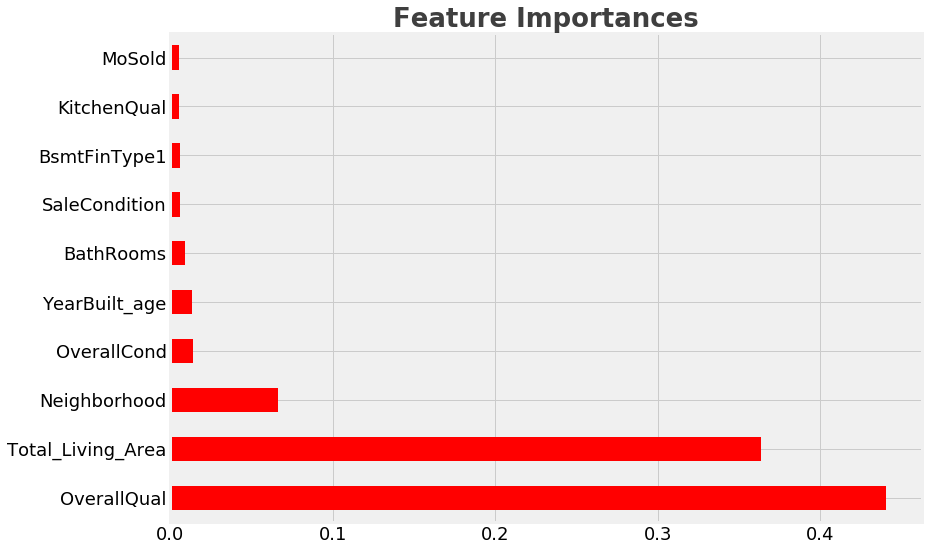

In [37]:
# Create a pd.Series of features importances
importances = pd.Series(data = rf.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh', figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

### Random forests hyperparameters

In [38]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [39]:
### Set the hyperparameter grid of RF
params_rf = {'n_estimators': range(100, 500, 25), # The number of trees in the forest
             'max_depth':[4,6,8]
             'max_features': ['log2', 'auto', 'sqrt'], #The number of features to consider when looking for the best split
             'min_samples_leaf': [2,10,303]} # The minimum number of samples required to be at a leaf node.

# If “auto”, then max_features=n_features.
# If “sqrt”, then max_features=sqrt(n_features).
# If “log2”, then max_features=log2(n_features).

SyntaxError: invalid syntax (<ipython-input-39-969a8b057d85>, line 4)

### Search for the optimal forest

In [40]:
grid_rf = GridSearchCV(estimator = rf, 
                       param_grid = params_rf,
                       scoring = 'neg_mean_squared_error', 
                       cv= 10,
                       verbose = 1, 
                       n_jobs = -1)

In [41]:
grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s


KeyboardInterrupt: 

### Evaluate the optimal forest



In [113]:
# Extract the best estimator
best_model = grid_rf.best_estimator_
print(best_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)


In [114]:
# Predict test set labels
y_pred = best_model.predict(X_test)

In [115]:
# Compute RMSE
RMSE_test = (MSE(y_test, y_pred))**0.5

In [116]:
print("Test RMSE of the best model: {}" .format(RMSE_test))

Test RMSE of the best model: 0.12247551205992994


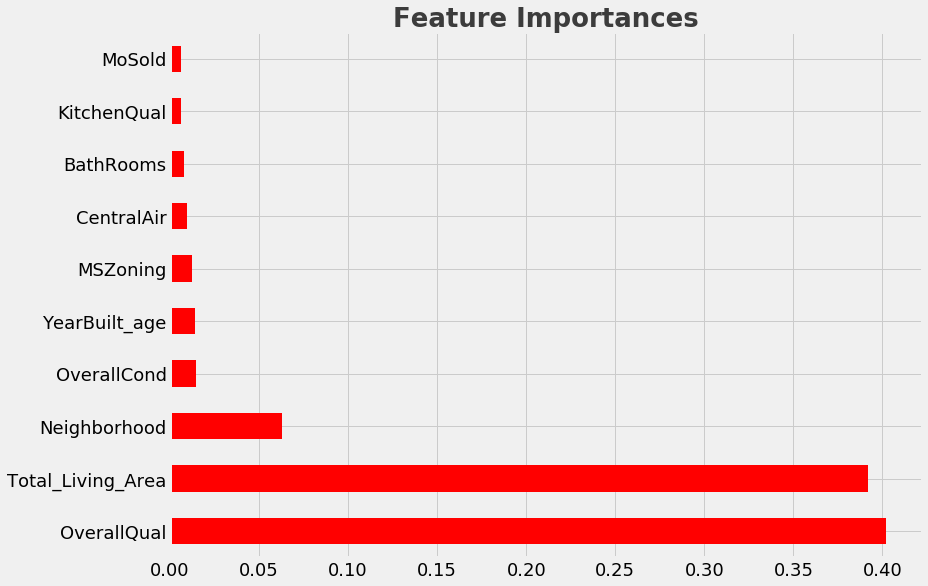

In [146]:
# Create a pd.Series of features importances
importances = pd.Series(data = best_model.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh', figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

In [138]:
params_rf2 = {'n_estimators': range(100, 500, 25), # The number of trees in the forest
             'max_depth':[4,6,8],
             'max_features': ['log2', 'auto', 'sqrt'], #The number of features to consider when looking for the best split
             'min_samples_leaf': [2,10,303]} # The minimum number of samples required to be at a leaf node.



In [ ]:
#### Search for the optimal Random Forest

In [139]:
grid_rf2 = GridSearchCV(estimator = rf, 
                       param_grid = params_rf2,
                       scoring = 'neg_mean_squared_error', 
                       cv= 10,
                       verbose = 1, 
                       n_jobs = -1)

In [140]:
grid_rf2.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  7.8min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(100, 500, 25), 'max_depth': [4, 6, 8], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 303]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [141]:
best_model2 = grid_rf2.best_estimator_
print(best_model2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=325, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)


In [142]:
# Predict test set labels
y_pred2 = best_model2.predict(X_test)

In [143]:
# Compute RMSE
RMSE_test = (MSE(y_test, y_pred2))**0.5

In [144]:
print("Test MSE of the best model: {}" .format(MSE_test))
print("Test RMSE of the best model: {}" .format(RMSE_test))

Test MSE of the best model: 0.014265412195217127
Test RMSE of the best model: 0.12413524530734445


### Visualizing features importances

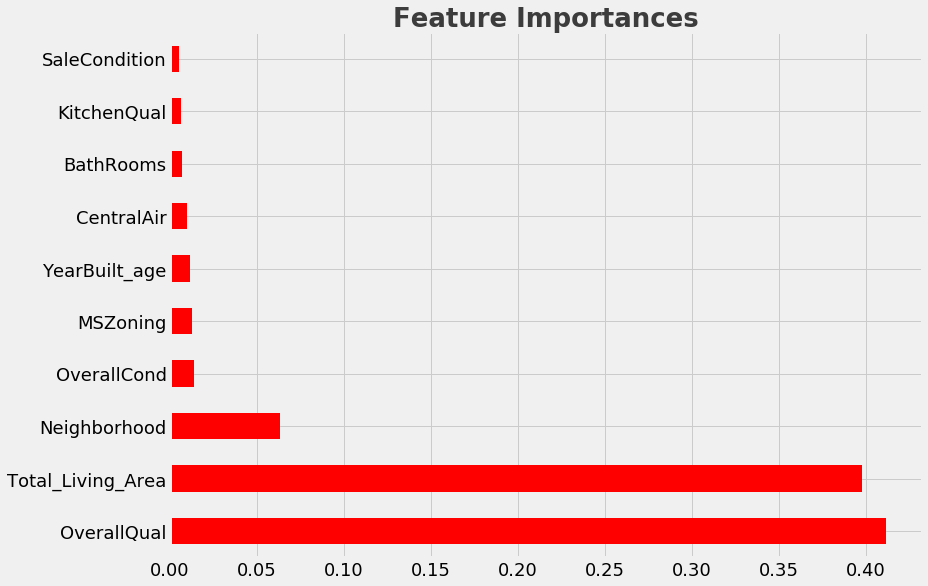

In [145]:
# Create a pd.Series of features importances
importances = pd.Series(data = best_model2.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh',figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

## Gradient Boosting Regression

In [62]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
#Instantiate GBR
gb = GradientBoostingRegressor(n_estimators = 200,
                              max_depth = 4,
                              random_state = 2)

In [64]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=2,
             subsample=1.0, verbose=0, warm_start=False)

In [65]:
y_pred = gb.predict(X_test)

In [66]:
MSE_test = MSE(y_pred, y_test)

In [67]:
RMSE_test = MSE(y_pred, y_test)**0.5

In [68]:
print('Test set MSE of gb: {}'.format(MSE_test))
print('Test set RMSE of gb: {}'.format(RMSE_test))

Test set MSE of gb: 0.01854043943378677
Test set RMSE of gb: 0.13616328225254695


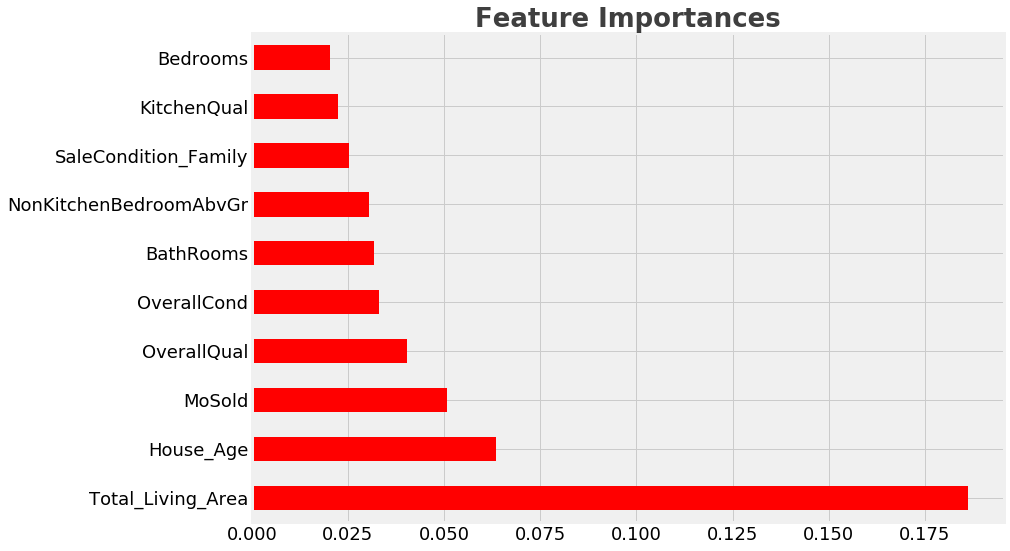

In [69]:
# Create a pd.Series of features importances
importances = pd.Series(data = gb.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh',figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

##  stochastic gradient boosting regression

In [70]:
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,               
            random_state=2)

In [71]:
# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=0.75,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=2,
             subsample=0.9, verbose=0, warm_start=False)

In [72]:
# Predict test set labels
y_pred = sgbr.predict(X_test)

In [73]:
#Compute test set MSE
mse_test = MSE(y_pred, y_test)

# Compute test set RMSE
rmse_test = mse_test**0.5

# Print rmse_test
print('Test set MSE of sgbr: {:.3f}'.format(mse_test))
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set MSE of sgbr: 0.019
Test set RMSE of sgbr: 0.136


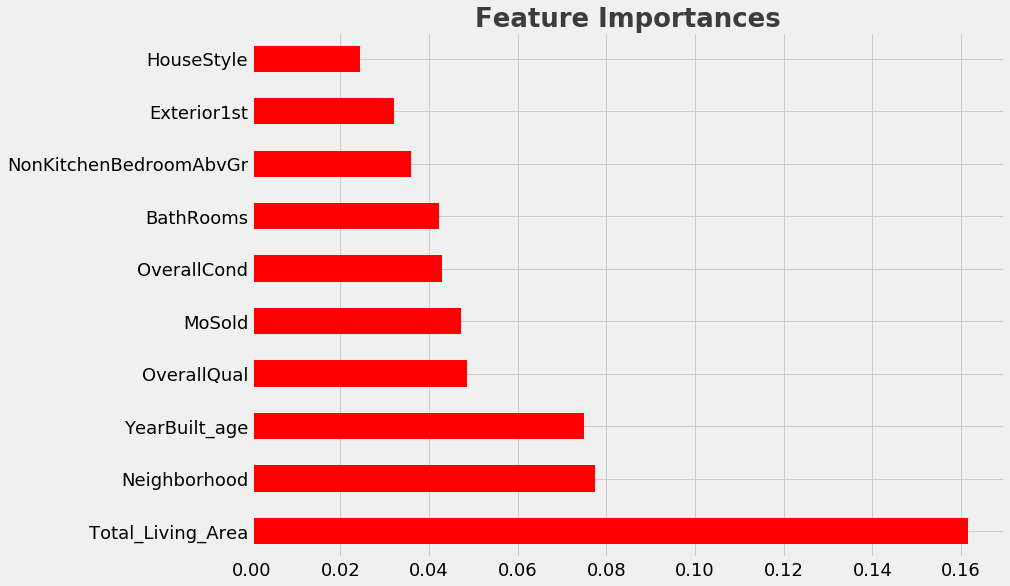

In [147]:
# Create a pd.Series of features importances
importances = pd.Series(data = sgbr.feature_importances_, 
                       index = X_train.columns)


# Sort Importances
importances_sorted = importances.sort_values(ascending = False)
#print(importances_sorted)

# Horizontal barplot

importances_sorted[:10].plot(kind = 'barh',figsize=(12,9),color = 'red')
plt.title('Feature Importances', fontsize = 26, weight = 'bold', alpha = .75)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
#set_yticklabels(labels = [-10, '0   ', '10   ', '20   ', '30   ', '40   ', '50%'])

### XGBoost --- tree

In [162]:



# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(MSE(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.047686


In [163]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(X_train, y_train)
DM_test = xgb.DMatrix(X_test, y_test)

In [164]:
# Create a parameter dictionary:params
params = {'booster': 'gblinear', 'objective': 'reg:linear'}

In [165]:
housing_matrix = xgb.DMatrix(data = X_train, label = y_train)

In [166]:
# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain = DM_train, num_boost_round=5)

In [167]:
# Predict the labels of the test set = preds
preds = xg_reg.predict(DM_test)

In [168]:
# Compute and print RMSE
rmse = np.sqrt(MSE(y_test,preds))
print('RMSE: {}'.format(rmse))

RMSE: 0.5095321956493729


In [169]:
params = {'objective': 'reg:linear', 'max_depth': 4}

In [170]:
cv_results = xgb.cv(dtrain = housing_matrix, params = params, nfold=4,
                   num_boost_round = 5, 
                   metrics = 'rmse', as_pandas = True, seed = 123)

[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:06:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [171]:
print (cv_results)

   test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0        8.079227       0.017502         8.079241        0.003843
1        5.667100       0.018348         5.665011        0.002669
2        3.976002       0.018037         3.974252        0.001594
3        2.792713       0.015066         2.790782        0.000905
4        1.962734       0.015774         1.962129        0.000455


In [172]:
# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

4    1.962734
Name: test-rmse-mean, dtype: float64


#### Mean Absolute Error

In [173]:
cv_results_mae = xgb.cv(dtrain = housing_matrix,
                        params = params,
                        nfold = 4,
                        num_boost_round = 5,
                        metrics = 'mae',
                        as_pandas = True,
                        seed = 123
                       )

[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:06:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

In [174]:
print(cv_results_mae)

   test-mae-mean  test-mae-std  train-mae-mean  train-mae-std
0       8.069201      0.016499        8.069201       0.003502
1       5.655095      0.015904        5.653279       0.003494
2       3.962659      0.015310        3.961190       0.002436
3       2.777218      0.011527        2.775832       0.002076
4       1.946031      0.013255        1.946301       0.000810


In [175]:
# Last Round test score
print(cv_results_mae['test-mae-mean'].tail(1))

4    1.946031
Name: test-mae-mean, dtype: float64


### Tuning the number of boosting rounds

In [203]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X_train, label=y_train)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:linear", "max_depth":3}

# Create list of number of boosting rounds
# number of boosting rounds = number of trees we build)
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# We'll use xgb.cv() inside a for loop and build one model per num_boost_round parameter.
# Iterate over num_rounds and build one model per num_boost_round parameter

for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))

df_num_boost_runs = pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"])


[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[11:42:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3


In [160]:
print (df_num_boost_runs)

   num_boosting_rounds      rmse
0                    5  1.962127
1                   10  0.370133
2                   15  0.158025


### Automated boosting round selection using early_stopping

In [161]:
# early stopping technique: More automated tuning compared to cherry picking parameters to tune.
# Early stopping works by testing the XGBoost model after every boosting
# round against a hold-out dataset and stopping the creation of 
# additional boosting rounds (thereby finishing training of the model 
# early) if the hold-out metric ("rmse" in our case) does not improve 
# for a given number of rounds. Here you will use the 
# early_stopping_rounds parameter in xgb.cv() with a large possible 
# number of boosting rounds (50). Bear in mind that if the holdout 
# metric continuously improves up through when num_boosting_rounds is 
# reached, then early stopping does not occur.

In [179]:
params = {"objective":"reg:linear", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain = housing_dmatrix, params = params, metrics = 'rmse', num_boost_round = 50, early_stopping_rounds = 10)

# Print cv_results
print(cv_results)
auto_early_stopping_df = pd.DataFrame(cv_results, columns = ['test-rmse-mean', 'test-rmse-std' , 'train-rmse-mean',  'train-rmse-std'])
print(auto_early_stopping_df)

[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[

[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[11:10:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

In [205]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid =gbm_param_grid,
    estimator = gbm,
    scoring = "neg_mean_squared_error",
    cv = 4)

# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  0.1446459870163877


In [208]:

gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions = gbm_param_grid, estimator = gbm, scoring = 'neg_mean_squared_error', n_iter = 5, cv = 4)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))


Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  0.8533329604401012
